Only necessary code pulled from data cleaning to get data to needed form for regression.

In [1]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime as dt
# from config import gkey
# from geopy import geocoders
# gmaps.configure(api_key=gkey)

In [2]:
file="Resources/attacks.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv(file,encoding = 'cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df2 = df.drop(['Name',  'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis=1)
df2. head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [4]:
df2 = df2.rename(columns={"Case Number": "case_number", 
                        "Date": "date", 
                        "Year": "year", 
                        "Type": "type", 
                        "Country": "country", 
                        "Area": "area",
                        "Location": "location",
                        "Activity": "activity",
                        "Sex ": "gender",
                        "Age": "age",
                        "Injury": "injury",
                        "Fatal (Y/N)": "fatal",})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   gender       5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal        5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


In [5]:
df2.drop_duplicates(subset="case_number", inplace=True)

In [6]:
df2 = df2[(df2['year'] >= 2000)]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  2072 non-null   object 
 1   date         2072 non-null   object 
 2   year         2072 non-null   float64
 3   type         2070 non-null   object 
 4   country      2070 non-null   object 
 5   area         1982 non-null   object 
 6   location     1985 non-null   object 
 7   activity     1981 non-null   object 
 8   gender       1969 non-null   object 
 9   age          1549 non-null   object 
 10  injury       2070 non-null   object 
 11  fatal        1913 non-null   object 
dtypes: float64(1), object(11)
memory usage: 210.4+ KB


In [8]:
df_us = df2[(df2['country'] == 'USA')]
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  1011 non-null   object 
 1   date         1011 non-null   object 
 2   year         1011 non-null   float64
 3   type         1011 non-null   object 
 4   country      1011 non-null   object 
 5   area         1011 non-null   object 
 6   location     1005 non-null   object 
 7   activity     963 non-null    object 
 8   gender       985 non-null    object 
 9   age          813 non-null    object 
 10  injury       1011 non-null   object 
 11  fatal        949 non-null    object 
dtypes: float64(1), object(11)
memory usage: 102.7+ KB


In [9]:
df_us_2 = df_us.replace('Reported','', regex=True)
df_us_3 = df_us_2.replace('--','-', regex=True)
df_us_3['date'] = df_us_3['date'].str.strip()
df_us_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  1011 non-null   object 
 1   date         1011 non-null   object 
 2   year         1011 non-null   float64
 3   type         1011 non-null   object 
 4   country      1011 non-null   object 
 5   area         1011 non-null   object 
 6   location     1005 non-null   object 
 7   activity     963 non-null    object 
 8   gender       985 non-null    object 
 9   age          813 non-null    object 
 10  injury       1011 non-null   object 
 11  fatal        949 non-null    object 
dtypes: float64(1), object(11)
memory usage: 102.7+ KB


In [10]:
df_us_3['date']= pd.to_datetime(df_us_3['date'],errors='coerce')
df_us_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2078
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 102.7+ KB


In [11]:
file="Resources/statelatlong.csv"
pd.set_option('display.max_columns', None)
df_states = pd.read_csv(file,encoding = 'cp1252')
df_states.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [12]:
df_states.rename(columns={"State":"state",
                          "Latitude":"latitude",
                          "Longitude":"longitude",
                          "City":"area"}, inplace=True)
df_states.head()

,state,latitude,longitude,area
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [13]:
df_usa = pd.merge(df_us_3, df_states, how="left", on="area")
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
 12  state        1002 non-null   object        
 13  latitude     1002 non-null   float64       
 14  longitude    1002 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(11)
memory usa

In [14]:
pd.to_numeric(df_usa.age,errors='coerce')

0       57.0
1       11.0
2       48.0
3       52.0
4       15.0
        ... 
1006    14.0
1007    37.0
1008    39.0
1009    27.0
1010     NaN
Name: age, Length: 1011, dtype: float64

In [15]:
df_usa["age_clean"]=pd.to_numeric(df_usa.age,errors='coerce')
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  1011 non-null   object        
 1   date         1009 non-null   datetime64[ns]
 2   year         1011 non-null   float64       
 3   type         1011 non-null   object        
 4   country      1011 non-null   object        
 5   area         1011 non-null   object        
 6   location     1005 non-null   object        
 7   activity     963 non-null    object        
 8   gender       985 non-null    object        
 9   age          813 non-null    object        
 10  injury       1011 non-null   object        
 11  fatal        949 non-null    object        
 12  state        1002 non-null   object        
 13  latitude     1002 non-null   float64       
 14  longitude    1002 non-null   float64       
 15  age_clean    790 non-null    float64       
dtypes: dat

In [16]:
df_usa["parent_injury"] = None

mask = df_usa.injury.str.lower().str.contains("lacerat")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("cut")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("gash")
df_usa.loc[mask,"parent_injury"]= "Laceration"


mask = df_usa.injury.str.lower().str.contains("fatal")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


mask = df_usa.injury.str.lower().str.contains("bit")
df_usa.loc[mask,"parent_injury"]= "Bite"


mask = df_usa.injury.str.lower().str.contains("nip")
df_usa.loc[mask,"parent_injury"]= "Bite"


mask = df_usa.injury.str.lower().str.contains("puncture")
df_usa.loc[mask,"parent_injury"]= "Puncture"


mask = df_usa.injury.str.lower().str.contains("injur")
df_usa.loc[mask,"parent_injury"]= "Minor Injury"


mask = df_usa.injury.str.lower().str.contains("abrasion")
df_usa.loc[mask,"parent_injury"]= "Minor Injury"


mask = df_usa.injury.str.lower().str.contains("no injury")
df_usa.loc[mask,"parent_injury"]= "No Injury"


mask = df_usa.injury.str.lower().str.contains("major")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


mask = df_usa.injury.str.lower().str.contains("severe")
df_usa.loc[mask,"parent_injury"]= "Severe Injury"


df_usa.loc[pd.isnull(df_usa.parent_injury), "parent_injury"] = "Other"

df_usa.parent_injury.value_counts()


Laceration       351
Bite             231
No Injury        131
Minor Injury     124
Puncture          96
Severe Injury     47
Other             31
Name: parent_injury, dtype: int64

In [17]:
df_usa["month"] = df_usa.date.dt.month
df_usa.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude,age_clean,parent_injury,month
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,CA,37.271875,-119.270415,57.0,No Injury,6.0
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,GA,32.678125,-83.222976,11.0,Minor Injury,6.0
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,HI,20.460000,-157.505000,48.0,Minor Injury,6.0
3,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,FL,27.975728,-83.833017,52.0,Minor Injury,5.0
4,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,FL,27.975728,-83.833017,15.0,Bite,5.0


In [18]:
df_usa['gender'] = df_usa['gender'].replace('lli','M', regex=True)
df_usa['gender'] = df_us_3['gender'].str.strip()
df_usa["gender"].value_counts()

M    347
F    112
Name: gender, dtype: int64

In [19]:
activities=pd.read_csv("Resources/activities.csv")

activities.drop("Count",axis=1,inplace=True)
activities.rename(columns={"Activity": "activity"}, inplace=True)
activities.head()

,activity,parent_activity
0,Surfing,on_water
1,Swimming,in_water
2,Wading,in_water
3,Fishing,fishing
4,Standing,other


In [20]:
df_usa=pd.merge(df_usa,activities,on="activity",how="left")

df_usa.head()

,case_number,date,year,type,country,area,location,activity,gender,age,injury,fatal,state,latitude,longitude,age_clean,parent_injury,month,parent_activity
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,CA,37.271875,-119.270415,57.0,No Injury,6.0,in_water
1,2018.06.18,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,GA,32.678125,-83.222976,11.0,Minor Injury,6.0,other
2,2018.06.09,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,HI,20.460000,-157.505000,48.0,Minor Injury,6.0,on_water
3,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,52,Minor injury to foot. PROVOKED INCIDENT,N,FL,27.975728,-83.833017,52.0,Minor Injury,5.0,fishing
4,2018.05.26.b,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,NaN,15,Lower left leg bitten,N,FL,27.975728,-83.833017,15.0,Bite,5.0,other


In [21]:
df_usa['year']= df_usa['year'].astype(float)

In [22]:
state = "FL"
df=df_usa.loc[df_usa.state != state,["case_number","year","month"]].dropna().reset_index(drop=True)
df=df.groupby(["year", "month"],as_index=False).case_number.count()
df.head()

,year,month,case_number
0,2000.0,3.0,1
1,2000.0,6.0,3
2,2000.0,7.0,4
3,2000.0,8.0,4
4,2000.0,9.0,2


End of data cleaning code. Start of data exploration and regression code.

In [23]:
import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

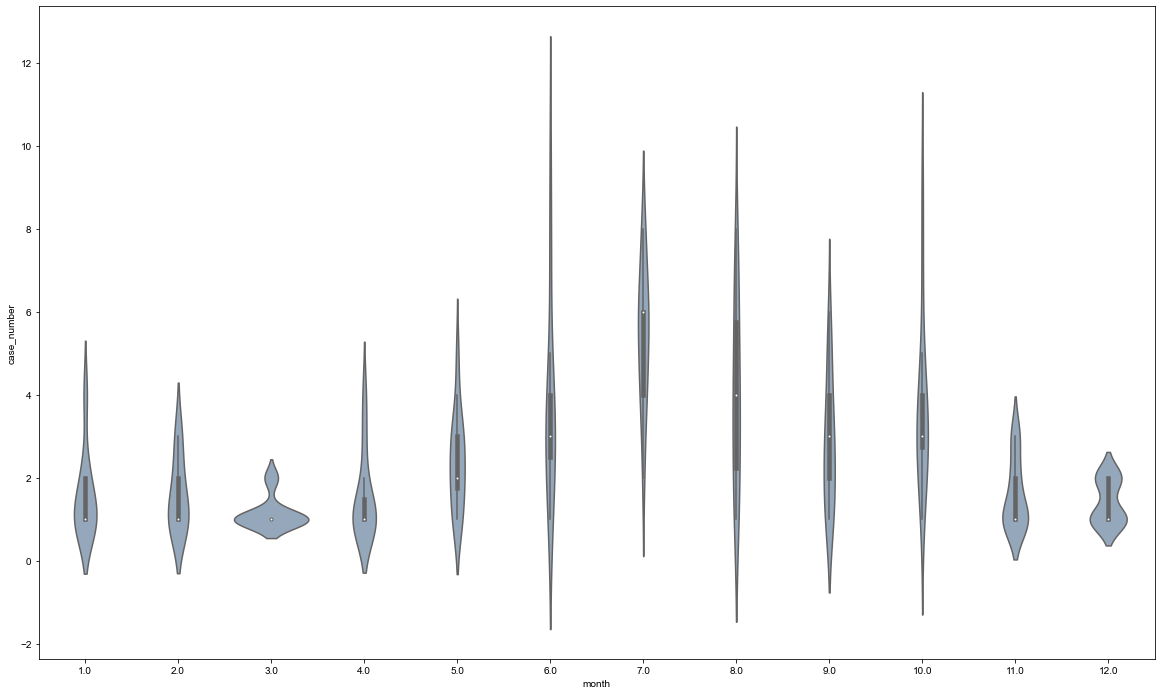

In [24]:
fig, ax = plt.subplots(figsize=(20,12))
sns.violinplot(data=df, x="month", y="case_number", color="#8fa7c0")
sns.set(rc={'axes.facecolor':'#f7f0de', 'figure.facecolor':'#f7f0de'})


plt.show()

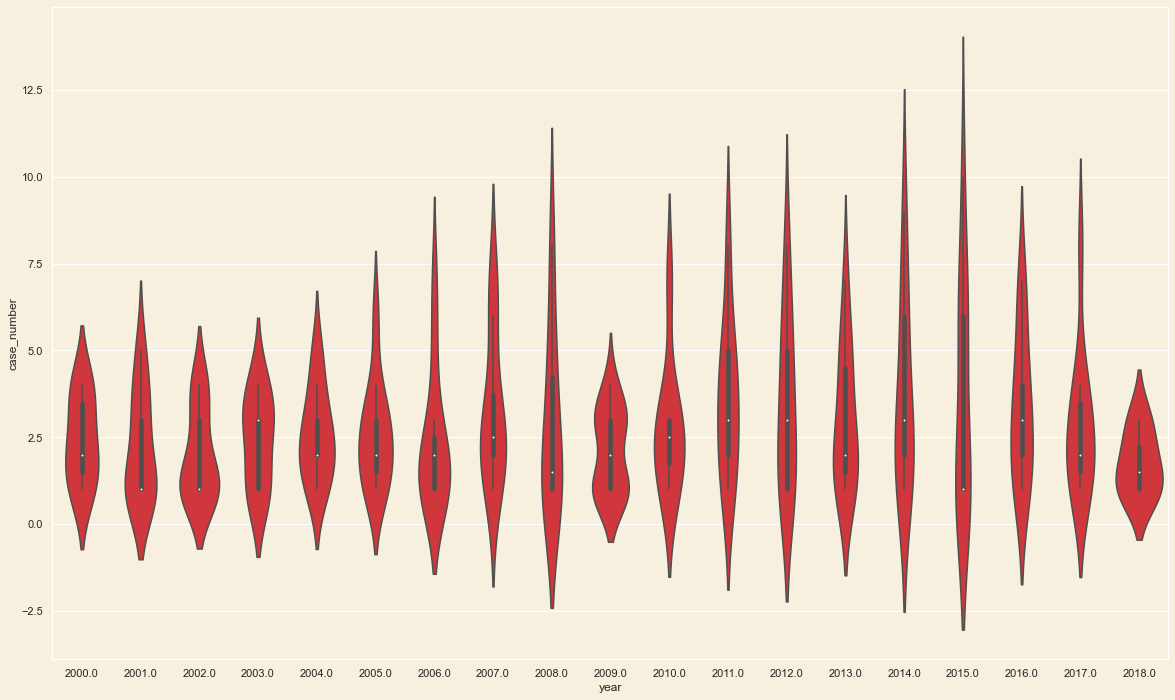

In [25]:
fig, ax = plt.subplots(figsize=(20,12))
sns.violinplot(data=df, x="year", y="case_number", color="#e91d25")
sns.set(rc={'axes.facecolor':'#f7f0de', 'figure.facecolor':'#f7f0de'})
plt.show()

In [26]:
def checkShapeOfData(df, col):
    # make histogram plot
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"HistPlot of {col}")
    plt.show()
    print()
    
    # boxplots
    plt.figure(figsize=(10,6))
    sns.boxplot(y=col, data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()
    print()
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = df[col].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # normaltest
    print()
    print("Normal test:")
    num = int(len(df)*0.1)
#     print(st.normaltest(df[col].sample(num)))

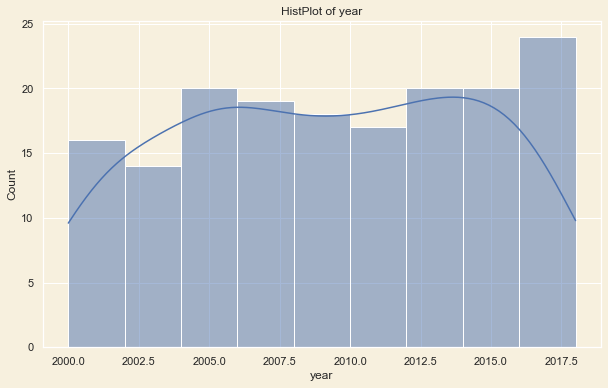

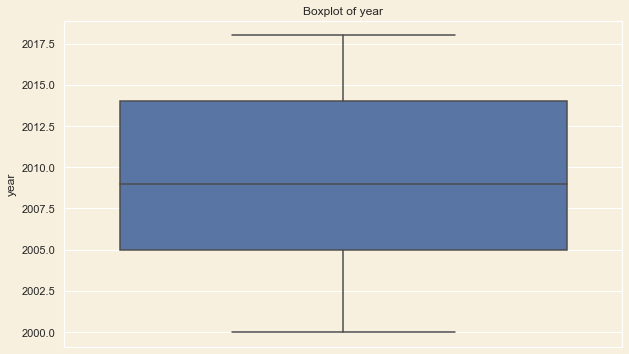


Values below 1991.5 could be outliers.
Values above 2027.5 could be outliers.

Normal test:


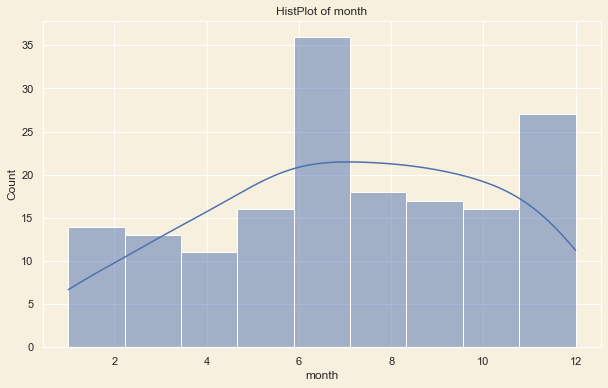

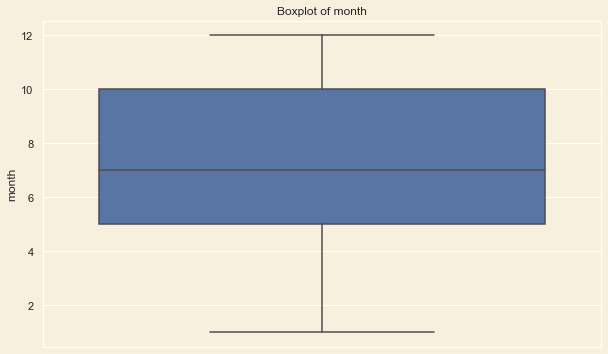


Values below -2.5 could be outliers.
Values above 17.5 could be outliers.

Normal test:


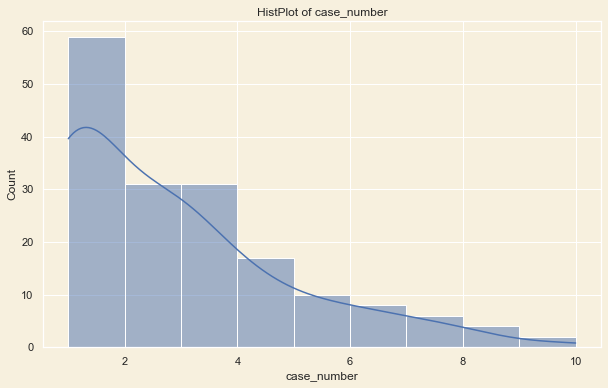

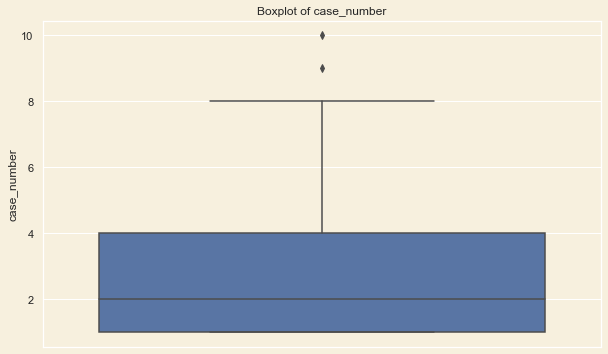


Values below -3.5 could be outliers.
Values above 8.5 could be outliers.

Normal test:


In [27]:
 cols = df.describe().columns
for col in cols:
    checkShapeOfData(df, col)

In [28]:
df.corr()

,year,month,case_number
year,1.000000,-0.010418,0.161638
month,-0.010418,1.000000,0.123094
case_number,0.161638,0.123094,1.000000


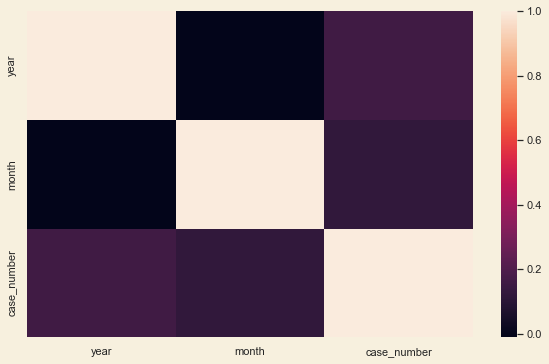

In [29]:
 corrs = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs)
sns.color_palette("light:b", as_cmap=True)
plt.show()

In [30]:
feature = df[["year","month"]]
target = df["case_number"]

In [31]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            case_number   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.590
Date:                Mon, 21 Nov 2022   Prob (F-statistic):             0.0298
Time:                        16:13:26   Log-Likelihood:                -351.16
No. Observations:                 168   AIC:                             708.3
Df Residuals:                     165   BIC:                             717.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -121.5698     57.920     -2.099      0.037    -235.930      -7.209
year           0.0616      0.029      2.138      0.034       0.005       0.119
month          0.0806      0.049      1.637      0.103      -0.017       0.178
==============================================================================
Omnibus:                       28.185   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.338
Skew:                           1.082   Prob(JB):                     1.29e-08
Kurtosis:                       3.710   Cond. No.                     7.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x = np.array(feature["year"])
x = x.reshape(-1, 1)

In [33]:
# SCIKIT_LEARN

reg = LinearRegression()
reg.fit((x), np.array(target))
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x, np.array(target)))

[0.06113642]
-120.01522987521554
0.026126975584496392


In [34]:
x

array([[2000.],
       [2000.],
       [2000.],
       [2000.],
       [2000.],
       [2000.],
       [2000.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2001.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2002.],
       [2003.],
       [2003.],
       [2003.],
       [2003.],
       [2003.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2004.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2005.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2006.],
       [2007.],
       [

In [35]:
reg.predict(x)

array([2.25760638, 2.25760638, 2.25760638, 2.25760638, 2.25760638,
       2.25760638, 2.25760638, 2.31874279, 2.31874279, 2.31874279,
       2.31874279, 2.31874279, 2.31874279, 2.31874279, 2.31874279,
       2.31874279, 2.37987921, 2.37987921, 2.37987921, 2.37987921,
       2.37987921, 2.37987921, 2.37987921, 2.37987921, 2.37987921,
       2.44101563, 2.44101563, 2.44101563, 2.44101563, 2.44101563,
       2.50215205, 2.50215205, 2.50215205, 2.50215205, 2.50215205,
       2.50215205, 2.50215205, 2.50215205, 2.50215205, 2.56328847,
       2.56328847, 2.56328847, 2.56328847, 2.56328847, 2.56328847,
       2.56328847, 2.56328847, 2.56328847, 2.56328847, 2.56328847,
       2.62442488, 2.62442488, 2.62442488, 2.62442488, 2.62442488,
       2.62442488, 2.62442488, 2.62442488, 2.62442488, 2.62442488,
       2.62442488, 2.6855613 , 2.6855613 , 2.6855613 , 2.6855613 ,
       2.6855613 , 2.6855613 , 2.6855613 , 2.6855613 , 2.74669772,
       2.74669772, 2.74669772, 2.74669772, 2.74669772, 2.74669

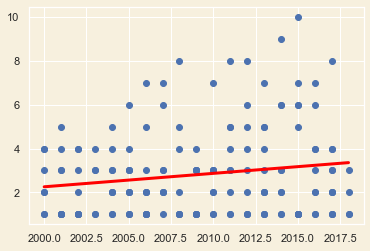

In [36]:
plt.scatter(x,target)
plt.plot(x,reg.predict(x),color="red", linewidth=3)
#plt.xlabel("Actual")
#plt.ylabel("Predicted")
#plt.xlim([2000, 2018])
plt.show()

In [37]:
predict = [2030]

predict = np.array(predict)
predict = predict.reshape(1, -1)
reg.predict(predict)

array([4.09169892])

In [38]:
 rf = RandomForestRegressor()
rf.fit(np.array(feature), np.array(target))
print(rf.score(np.array(feature), np.array(target)))

0.8847453708712038


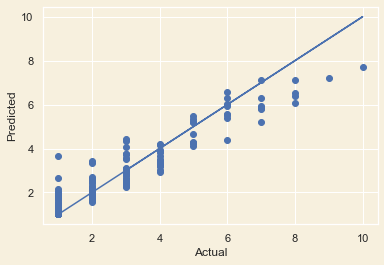

In [39]:
plt.scatter(target, rf.predict(np.array(feature)))
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [40]:
data = feature.iloc[0]
data

year     2000.0
month       3.0
Name: 0, dtype: float64

In [41]:
data["year"] = 2017
data["month"] = 9
rf.predict([data])

array([2.62])